In [25]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten

In [4]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape , X_test.shape

((60000, 28, 28), (10000, 28, 28))

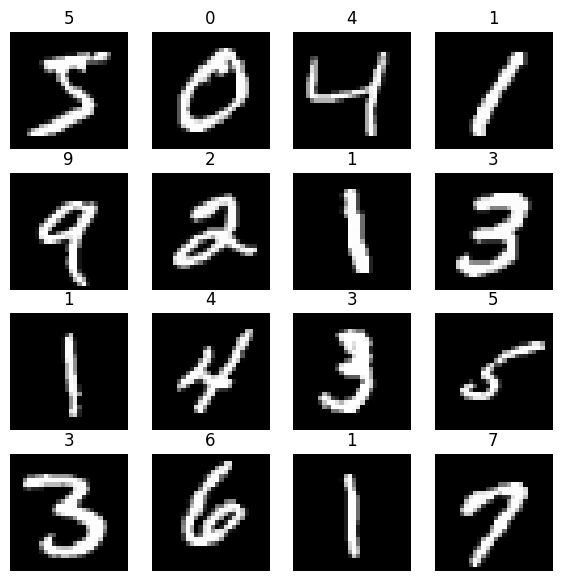

In [19]:
plt.figure(figsize=(7, 7))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_train[i], cmap='grey')
    plt.title(y_train[i])
    plt.axis('off')

In [20]:
X_train[0].shape

(28, 28)

In [21]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [23]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [27]:
input_shape = X_train[0].shape
model = Sequential([
    Conv2D(6, kernel_size=(5,5), strides=1, padding='same', input_shape =input_shape, activation='relu'),
    AveragePooling2D(pool_size=(2, 2), strides=2),
    
    Conv2D(16, kernel_size=(5, 5), strides=1, padding='valid', activation='relu'),
    AveragePooling2D(pool_size=(2, 2), strides=2),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    
    Dense(84, activation='relu'),
    
    Dense(10, activation='softmax')
])

In [28]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
model.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8549 - loss: 0.4572 - val_accuracy: 0.9765 - val_loss: 0.0717
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9755 - loss: 0.0787 - val_accuracy: 0.9814 - val_loss: 0.0542
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9820 - loss: 0.0578 - val_accuracy: 0.9864 - val_loss: 0.0408
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9857 - loss: 0.0462 - val_accuracy: 0.9885 - val_loss: 0.0386
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9889 - loss: 0.0347 - val_accuracy: 0.9888 - val_loss: 0.0348
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9918 - loss: 0.0268 - val_accuracy: 0.9883 - val_loss: 0.0348
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9931 - loss: 0.0216 - val_accuracy: 0.9875 - val_loss: 0.0393
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9934 - loss: 0.0209

In [32]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9848 - loss: 0.0803


[0.06673956662416458, 0.988099992275238]

In [33]:
model.save('MNIST.keras')